<a href="https://colab.research.google.com/github/AjayR07/KEC-Attendance-ERP-V2.1/blob/main/KecStudent%2B_Attendance_ERP_V2_0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

---




># 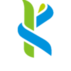
>#  KecStudent+ Attendance ERP V 2.1

> ~ Authored By : Ajay ( TeamA3 )
---
---

# Instructions to use :


1.   Click ( File -> Make a Copy ) and Save in you drive (First time only)

2.   Fill the Form and Run the Section

3.   If Google Authentication is asked, Click on the link in the output and choose account and copy code and paste it on the text field.

5.   Enter the Nominal Roll Google Sheet Share URL (Edit Link) [Click to download Sample Format](https://docs.google.com/spreadsheets/d/1fnnBZFB6bKSlL4bUM52yRPh4vgoMkzejWTUQjllXldw/edit?usp=sharing)

6.   Enter the Attendance and Poll Report (Edit Link) URL in the Form

7.   Attendance will be updated in the Nominal Roll Sheet


---
---












# Attendance Logger


###  1.  **Fill the Form First**

### 2.  **Then Run this Section**      *Ctrl+Shift+Enter*

In [ ]:
#@title
# Importing Necessary Python Libraries

from google.colab import files
import io

import pandas as pd
import numpy as np
import math

# Google Sheet Authentication

from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())



#@title

# Config

# Minimum Time Duration
dur=40


# Functions for Extracting and Consolidating Data

def ComputeDataFrame(Attendance_Report,Poll_Report):
  wb = gc.open_by_url(Attendance_Report)
  worksheet = wb.get_worksheet(0)
  attd = pd.DataFrame(worksheet.get_all_values())
  new_header = attd.iloc[0] 
  attd = attd[1:] 
  attd.columns = new_header 
  attd=attd.rename(columns={"Last name": "Roll", "Duration": "Attd"})
  attd=attd[['Roll','Attd']]


  wb = gc.open_by_url(Poll_Report)
  worksheet = wb.get_worksheet(0)
  poll = pd.DataFrame(worksheet.get_all_values())
  new_header = poll.iloc[0] 
  poll = poll[1:] 
  poll.columns = new_header 
  poll=poll.rename(columns={"Name": "Roll"})
  poll["Roll"]=poll["Roll"].str.split().str[-1]
  return (attd,poll)

def getColumnName(n):
    result = ""
    while n > 0:
        index = (n - 1) % 26
        result += chr(index + ord('A'))
        n = (n - 1) // 26
    return result[::-1]



def Processor(date,pd):
  if len(nominal.columns)+1>worksheet.col_count:
    worksheet.add_cols(1)
  c=getColumnName(len(nominal.columns)+1)
  r=nominal[0].count()
  rang= c+'1:'+c+str(r)
  
  min_poll=round(0.8*(Poll.shape[1]-1))
  
  
  cell_list = worksheet.range(rang)
  res={"Present":0,"Absent":0,"Absentees":""};
  for index,cell in enumerate(cell_list):
    reg=nominal[1][index]

    if index==0:
      cell.value = date+"  ~  "+pd
    else:
      t=p=False
      
      if reg in set(Attd['Roll']):
        tym=np.array(Attd.loc[Attd['Roll'] == reg]['Attd'].str.split().str[0])
        if int(tym[0])>=dur:
          t=True

      if reg in set(Poll['Roll']):
        row=Poll.loc[Poll['Roll'] == reg]
        
        cnt=0
        for idx,i in enumerate(row):
          if idx==0: continue
          if np.array(row[i])[0]!='':
            cnt+=1
        if cnt>=min_poll:
          p=True

      if t and p :
        cell.value ="Present"
        res["Present"]+=1
      else:
        cell.value ="Absent"
        res["Absentees"]+=reg+"   -   "+nominal[2][index]+"\n"
        res["Absent"]+=1
  worksheet.update_cells(cell_list)
  total=res["Present"]+res["Absent"]
  per=str(int((res["Present"]/total)*100))+" %"
  sheet2.append_row([date,pd,res["Present"],res["Absent"],total,res["Absentees"],per])



# Open our Nominal Roll Google Sheet and add the Attendance.
Nominal_Roll_URL ='https://docs.google.com/spreadsheets/d/1EDgyoLndkkmsHserrD8ai2grm60gnsYj3tOrUL1k6_Y/edit?usp=sharing'  #@param {type:"string",placeholder:"Heloo"}
Date = '2021-07-22'  #@param {type: "date"}
Period = "6" #@param [1,2,3,4,5,6] {allow-input: true}
Attendance_Report ='https://docs.google.com/spreadsheets/d/1SnqkPhFUaXMvugqev-H1OsJDX4JdIt9vOjID2Rm9Wiw/edit?usp=sharing'  #@param {type:"string",placeholder:"Heloo"}
Poll_Report ='https://docs.google.com/spreadsheets/d/1QnaV4NJEj6XLYI5-SgeCaz6vR7KlGJ72PEkXEbgSL3U/edit?usp=sharing'  #@param {type:"string",placeholder:"Heloo"}

wb = gc.open_by_url(Nominal_Roll_URL)
worksheet = wb.get_worksheet(0)
sheet2=wb.get_worksheet(1)

res=ComputeDataFrame(Attendance_Report,Poll_Report)

nominal = pd.DataFrame(worksheet.get_all_values())
Attd=res[0]
Poll=res[1]


Processor(Date,Period)
print("\nAttendance Consolidated\n Check it out in the below link\n"+Nominal_Roll_URL)